# 3.1.3. Sensor-to-sample distance

This code generates all the results presented in the subsubsection 3.1.1 Validation test.

### License

This code is licensed under under the [BSD 3-clause](http://choosealicense.com/licenses/bsd-3-clause/) license. See the file `LICENSE.md`

### Import the required dependencies

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from IPython.display import Image
from fatiando.vis import mpl, myv
from fatiando.gravmag import prism, sphere
from fatiando.utils import contaminate

In [3]:
mpl.rcParams['font.size'] = 16

In [4]:
import functions as f

### Load data from txt files

These data are the output of the application to real data.

In [5]:
files = ['..\\data\\data0.txt', 
         '..\\data\\data1.txt',
         '..\\data\\data2.txt',
         '..\\data\\data3.txt']

nfiles = len(files)

In [6]:
data = []

for i in range(nfiles):
    data.append(np.loadtxt(files[i]))

In [7]:
mag_true = np.loadtxt('..\\data\\estimate_real.txt')

In [8]:
mag_true

array([[  131.01194,    16.41442,    39.54302],
       [  673.98806,    26.6138 ,   169.88033],
       [  989.84953,    30.33975,   170.6616 ],
       [  997.18983,    24.82375,   168.10551],
       [  560.82558,    62.814  ,   127.70374],
       [ 1357.78891,    56.39737,     9.24522],
       [ 1091.98779,    43.99581,    13.09021],
       [ 1158.32525,    55.09479,    14.65751],
       [  355.01222,   -12.85966,     5.89837],
       [ 1292.03672,   -76.35431,    -5.81355],
       [ 1124.4815 ,   -75.15218,    -3.96007],
       [ 1326.11982,   -74.43655,    -7.43013],
       [  291.41501,    63.01156,    39.56695],
       [ 1236.55544,    85.55372,    77.15178],
       [ 1242.73408,    84.49428,    43.78384],
       [ 1130.17555,    83.85608,   159.73456]])

Here, the estimated magnetization obtained with real data is modified in order to simulate an observed data set. Only the estimated inclination and declination are modified.

In [9]:
mean_inc0 = np.mean(mag_true[1:4,1])
mean_inc1 = np.mean(mag_true[5:8,1])
mean_inc2 = np.mean(mag_true[9:12,1])
mean_inc3 = np.mean(mag_true[13:16,1])

mean_dec0 = np.mean(mag_true[1:4,2])
mean_dec1 = np.mean(mag_true[5:8,2])
mean_dec2 = np.mean(mag_true[9:12,2])
mean_dec3 = np.mean(mag_true[13:16,2])

In [10]:
mag_true[0:4,1] = mean_inc0
mag_true[4:8,1] = mean_inc1
mag_true[8:12,1] = mean_inc2
mag_true[12:16,1] = mean_inc3

In [11]:
mag_true[0:4,2] = mean_dec0
mag_true[4:8,2] = mean_dec1
mag_true[8:12,2] = mean_dec2
mag_true[12:16,2] = mean_dec3

In [12]:
mag_true

array([[  131.01194   ,    27.2591    ,   169.54914667],
       [  673.98806   ,    27.2591    ,   169.54914667],
       [  989.84953   ,    27.2591    ,   169.54914667],
       [  997.18983   ,    27.2591    ,   169.54914667],
       [  560.82558   ,    51.82932333,    12.33098   ],
       [ 1357.78891   ,    51.82932333,    12.33098   ],
       [ 1091.98779   ,    51.82932333,    12.33098   ],
       [ 1158.32525   ,    51.82932333,    12.33098   ],
       [  355.01222   ,   -75.31434667,    -5.73458333],
       [ 1292.03672   ,   -75.31434667,    -5.73458333],
       [ 1124.4815    ,   -75.31434667,    -5.73458333],
       [ 1326.11982   ,   -75.31434667,    -5.73458333],
       [  291.41501   ,    84.63469333,    93.55672667],
       [ 1236.55544   ,    84.63469333,    93.55672667],
       [ 1242.73408   ,    84.63469333,    93.55672667],
       [ 1130.17555   ,    84.63469333,    93.55672667]])

### Parameters of the sample

In [13]:
P = 16 # number of prisms forming the sample
M = 3*P # number of parameters to be estimated

Lx = 0.001 # in m
Ly = 0.003 # in m
Lz = Ly  # in m

shape = (42,102) # (Ny, Nx)

In [14]:
xmin_sample = -0.5*Lx*P #in m
centers = [100.*(xmin_sample + 0.5*Lx + i*Lx) for i in range(P)] #in cm

### Synthetic Sample

In [15]:
sample = f.sample(Lx,Ly,Lz,P, m = mag_true[:,0], inc = mag_true[:,1], dec = mag_true[:,2])

### Synthetic data

In [16]:
# Simulate a Gaussian noise with null mean
stdev_data = 30000.0 # nT

# Simulate sensor-to-sample errors

# standard deviation of h per line
dh = (10.**-6)*(100.) # m

# constant shift per plane
h0 = (10.**-6)*(80.) # m
h1 = (10.**-6)*(-170.) # m
h2 = (10.**-6)*(-100.) # m
h3 = (10.**-6)*(270.) # m

h_error0 = np.resize(np.random.normal(loc=h0, scale=dh, size=shape[0]), (shape[1], shape[0])).T.ravel()
h_error1 = np.resize(np.random.normal(loc=h1, scale=dh, size=shape[0]), (shape[1], shape[0])).T.ravel()
h_error2 = np.resize(np.random.normal(loc=h2, scale=dh, size=shape[0]), (shape[1], shape[0])).T.ravel()
h_error3 = np.resize(np.random.normal(loc=h3, scale=dh, size=shape[0]), (shape[1], shape[0])).T.ravel()

In [17]:
B_obs = [contaminate(f.magnetic_data(data[0][:,0], data[0][:,1], data[0][:,2] + h_error0, 
                                     sample, alpha=0, eff_area = (300., 300.)), stddev = stdev_data),
         contaminate(f.magnetic_data(data[1][:,0], data[1][:,1] + h_error1, data[1][:,2], 
                                     sample, alpha=1, eff_area = (300., 300.)), stddev = stdev_data),
         contaminate(f.magnetic_data(data[2][:,0], data[2][:,1], data[2][:,2] + h_error2, 
                                     sample, alpha=2, eff_area = (300., 300.)), stddev = stdev_data),
         contaminate(f.magnetic_data(data[3][:,0], data[3][:,1] + h_error3, data[3][:,2], 
                                     sample, alpha=3, eff_area = (300., 300.)), stddev = stdev_data)]

### Interpretation model

In [18]:
model = f.sample(Lx,Ly,Lz,P)

In [19]:
xmin = np.min([data[0][:,0], data[1][:,0], data[2][:,0], data[3][:,0]])
xmax = np.max([data[0][:,0], data[1][:,0], data[2][:,0], data[3][:,0]])
ymin = np.min([data[0][:,1], data[1][:,1], data[2][:,1], data[3][:,1]])
ymax = np.max([data[0][:,1], data[1][:,1], data[2][:,1], data[3][:,1]])
zmin = np.min([data[0][:,2], data[1][:,2], data[2][:,2], data[3][:,2]])
zmax = np.max([data[0][:,2], data[1][:,2], data[2][:,2], data[3][:,2]])

volume = [xmin, xmax, ymin, ymax, zmin, zmax]

### Inversion

In [20]:
A = []
for i in range(4):
    A.append(f.sensitivity(P, data[i][:,0], data[i][:,1], data[i][:,2], model, alpha = i, eff_area = (300., 300.)))

In [21]:
R = np.zeros(M+1)
R[0] = 1.
R[3] = -1.
R = np.resize(R, (M-3,M))

In [23]:
u0 = [1.0e-10, 1.0e-10, 1.0e-10, 1.0e-10]
f0 = []
p_est = []
mag_r = []

H = np.dot(A[0].T, A[0])
if u0[0] != 0.:
    f0.append(np.trace(H)/M)
    H = H + u0[0]*f0[0]*np.dot(R.T, R)
h = np.dot(A[0].T, B_obs[0])
p_est.append(np.linalg.solve(H, h))
mag_r.append(f.parameters_sph(P,p_est[0]))

for i in range(1,4):
    H = np.dot(np.vstack(A[:i]).T, np.vstack(A[:i]))
    if u0[i] != 0.:
        f0.append(np.trace(H)/M)
        H = H + u0[i]*f0[i]*np.dot(R.T, R)
    h = np.dot(np.vstack(A[:i]).T, np.hstack(B_obs[:i]))
    p_est.append(np.linalg.solve(H, h))
    mag_r.append(f.parameters_sph(P,p_est[i]))

mag_r = np.array(mag_r)

In [24]:
B_pre = []
for i in range(4):
    B_pre.append(np.dot(A[i],p_est[3]))

In [25]:
r_norm = []
r_mean = []
r_std = []

for i in range(4):
    aux1,aux2,aux3 = f.residual(0.001*B_obs[i],0.001*B_pre[i])
    r_norm.append(aux1) # in uT
    r_mean.append(aux2) # in uT
    r_std.append(aux3)  # in uT

### Plotting of the observed and predicted data 

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


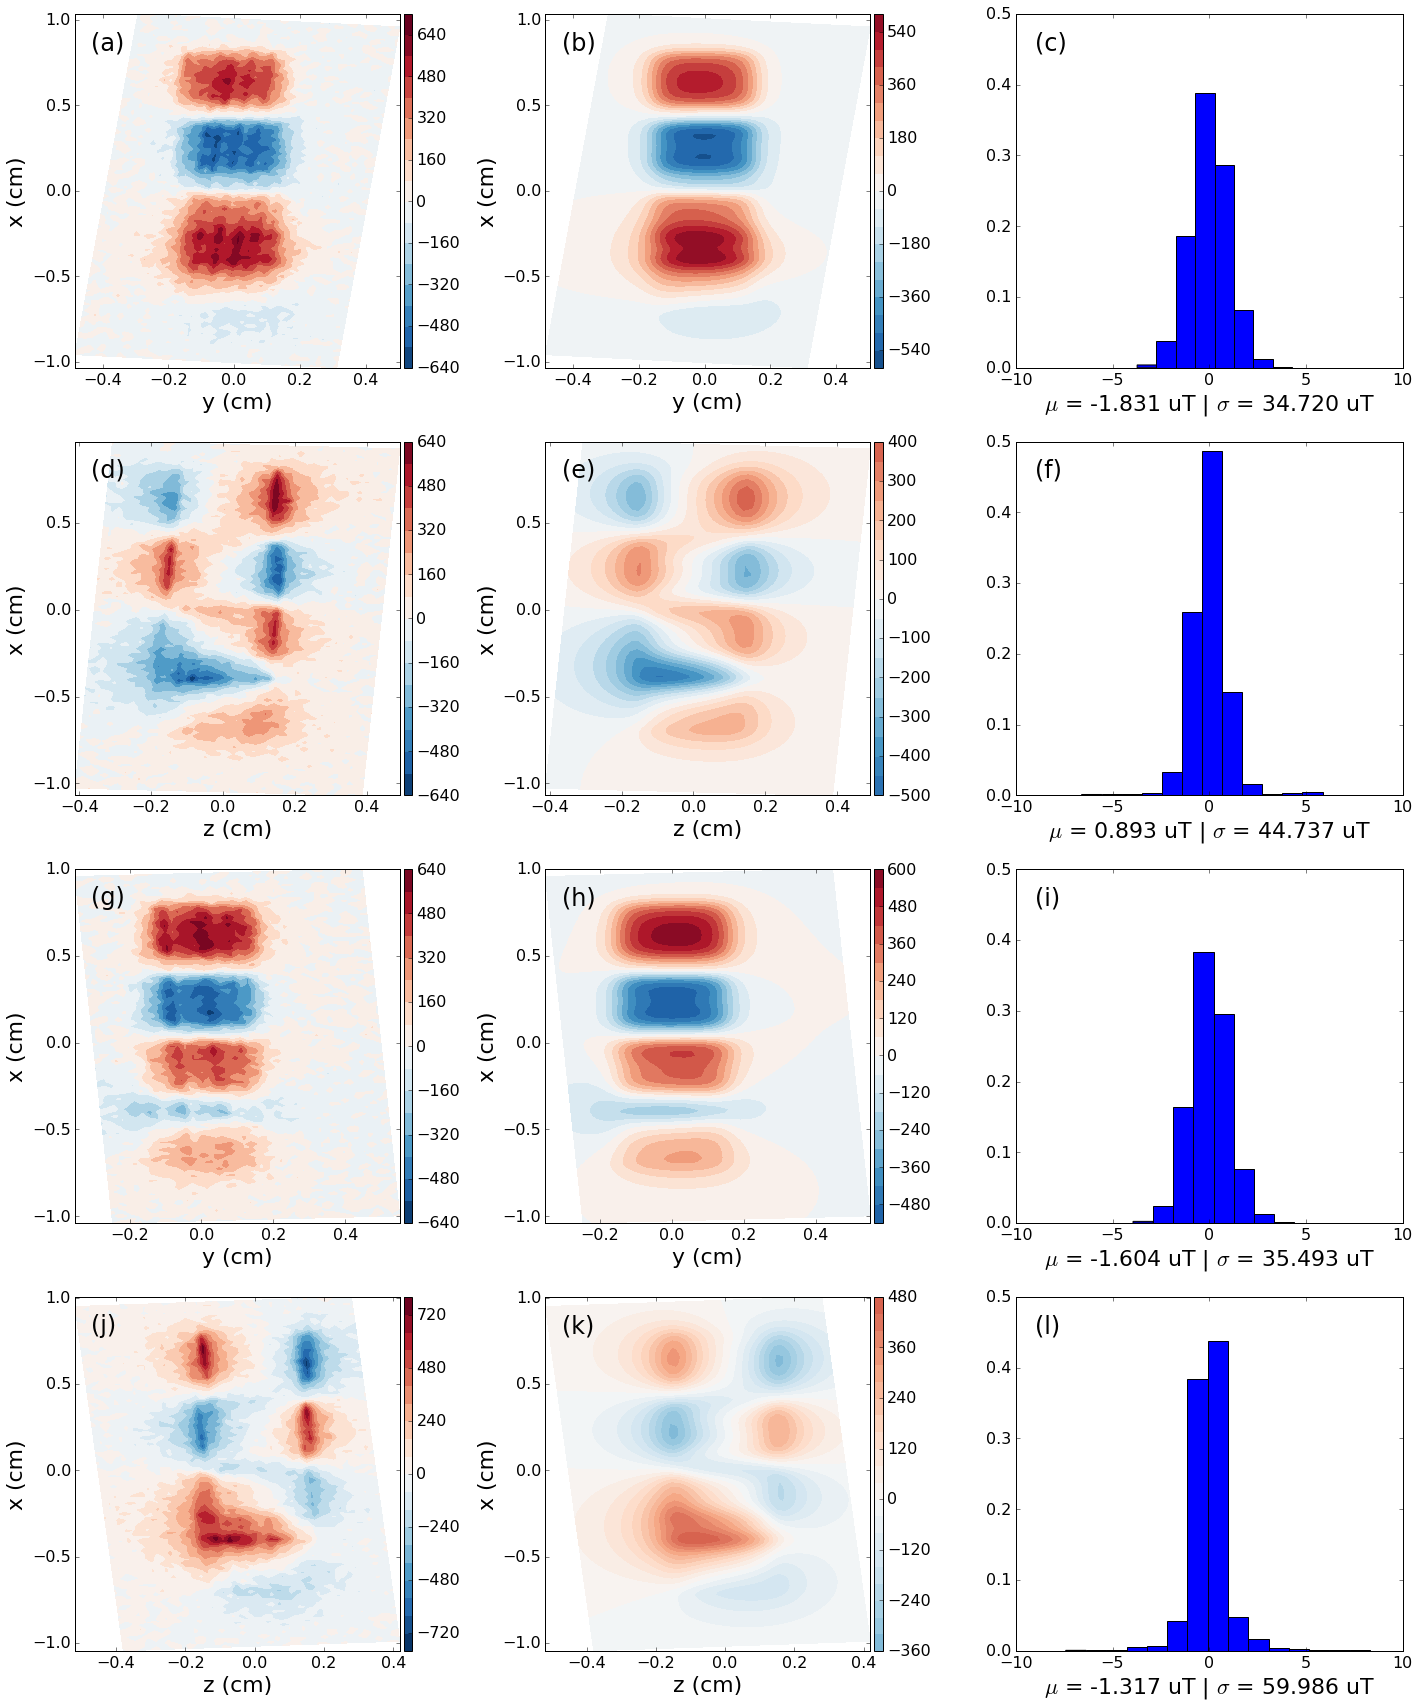

In [26]:
title_font = 22
bottom_font = 16

labels = ['(a)', '(b)', '(c)', 
          '(d)', '(e)', '(f)',
          '(g)', '(h)', '(i)',
          '(j)', '(k)', '(l)']

lables_place = (0.05, 0.90)
lables_size = 24

mpl.close('all')
mpl.figure(figsize=(20,24), tight_layout=True)

for i in range(0,4,2):

    # in uT
    ranges = 0.001*np.abs([B_obs[i].max(), B_obs[i].min(),
                           B_pre[i].max(), B_pre[i].min()]).max()

    mpl.subplot(4,3,1 + 3*i)

    #mpl.title(labels[3*i], fontsize=title_font)
    nlevels = mpl.contourf(100.*data[i][:,1], 100.*data[i][:,0], 0.001*B_obs[i], 
                           shape, 20, cmap=mpl.cm.RdBu_r,
                           vmin=-ranges, vmax=ranges)
    #mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('uT')
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
    mpl.xlabel('y (cm)', fontsize = title_font)
    mpl.ylabel('x (cm)', fontsize = title_font)
    mpl.annotate(labels[3*i], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

    mpl.subplot(4,3,1 + 3*i + 1)

    #mpl.title(labels[3*i + 1], fontsize=title_font)
    nlevels = mpl.contourf(100.*data[i][:,1], 100.*data[i][:,0], 0.001*B_pre[i], 
                           shape, 20, cmap=mpl.cm.RdBu_r,
                           vmin=-ranges, vmax=ranges)
    #mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('uT')
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
    mpl.xlabel('y (cm)', fontsize = title_font)
    mpl.ylabel('x (cm)', fontsize = title_font)
    mpl.annotate(labels[3*i + 1], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

    mpl.subplot(4,3,1 + 3*i + 2)
    #mpl.title(labels[3*i + 2], fontsize=title_font)
    mpl.xlabel('$\mu$ = %.3f uT | $\sigma$ = %.3f uT' % (r_mean[i], r_std[i]), fontsize = title_font)
    nbins = int((np.max(r_norm[i]) - np.min(r_norm[i])))
    mpl.hist(r_norm[i],bins=nbins,normed=True)
    mpl.ylim(0.,0.5)
    mpl.xlim(-10., 10.)
    mpl.annotate(labels[3*i + 2], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)
    
for i in range(1,4,2):

    # in uT
    ranges = 0.001*np.abs([B_obs[i].max(), B_obs[i].min(),
                           B_pre[i].max(), B_pre[i].min()]).max()

    mpl.subplot(4,3,1 + 3*i)

    #mpl.title(labels[3*i], fontsize=title_font)
    nlevels = mpl.contourf(100.*data[i][:,2], 100.*data[i][:,0], 0.001*B_obs[i], 
                           shape, 20, cmap=mpl.cm.RdBu_r,
                           vmin=-ranges, vmax=ranges)
    #mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('uT')
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
    mpl.xlabel('z (cm)', fontsize = title_font)
    mpl.ylabel('x (cm)', fontsize = title_font)
    mpl.annotate(labels[3*i], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

    mpl.subplot(4,3,1 + 3*i + 1)

    #mpl.title(labels[3*i + 1], fontsize=title_font)
    nlevels = mpl.contourf(100.*data[i][:,2], 100.*data[i][:,0], 0.001*B_pre[i], 
                           shape, 20, cmap=mpl.cm.RdBu_r,
                           vmin=-ranges, vmax=ranges)
    #mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('uT')
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0)
    mpl.xlabel('z (cm)', fontsize = title_font)
    mpl.ylabel('x (cm)', fontsize = title_font)
    mpl.annotate(labels[3*i+1], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

    mpl.subplot(4,3,1 + 3*i + 2)
    #mpl.title(labels[3*i + 2], fontsize=title_font)
    mpl.xlabel('$\mu$ = %.3f uT | $\sigma$ = %.3f uT' % (r_mean[i], r_std[i]), fontsize = title_font)
    nbins = int((np.max(r_norm[i]) - np.min(r_norm[i])))
    mpl.hist(r_norm[i],bins=nbins,normed=True)
    mpl.ylim(0.,0.5)
    mpl.xlim(-10., 10.)
    mpl.annotate(labels[3*i+2], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

mpl.savefig('..\\manuscript\\Figs\\Fig9_HQ.eps')
mpl.savefig('..\\manuscript\\Figs\\Fig9_LQ.png')

mpl.show()

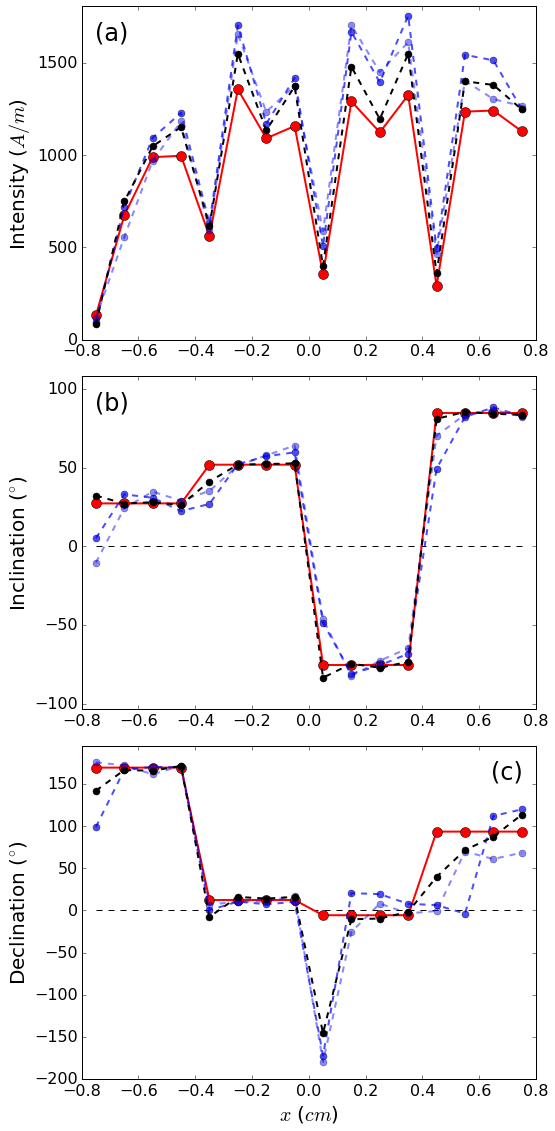

In [27]:
line_sty = ['b--', 'b--', 'b--', 'k--']
mark_sty = ['bo', 'bo', 'bo', 'ko']

label_font = 20
legend_font = 16

labels = ['(a)', '(b)', '(c)']

lables_place = (0.03, 0.90)
lables_size = 24

mpl.show()
mpl.close('all')
mpl.figure(figsize=(8, 16), tight_layout=True)

mpl.subplot(3,1,1)
#mpl.plot([np.min(centers), np.max(centers)], [1200.0, 1200.0], 'k--',
#         label='Saturation magnetization')
mpl.plot(centers, mag_true[:,0], 'r-', linewidth=2)
mpl.plot(centers, mag_true[:,0], 'ro', markersize=10, label='True')

for i, mr in enumerate(mag_r):
    mpl.plot(centers, mr[:,0], line_sty[i], alpha=0.1+i*0.3, linewidth=2)
    mpl.plot(centers, mr[:,0], mark_sty[i], alpha=0.1+i*0.3, markersize=7,label='Estimated')

mpl.ylabel('Intensity ($A/m$)', fontsize=label_font)
mpl.ylim(0., np.max(mag_r[:,:,0]) + 50.)
#mpl.legend(loc='best', numpoints=1)
mpl.annotate(labels[0], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(3,1,2)
mpl.plot([np.min(centers), np.max(centers)], [0.0, 0.0], 'k--')
#mpl.plot([np.min(centers), np.max(centers)], [45.0, 45.0], 'k--')
#mpl.plot([np.min(centers), np.max(centers)], [90.0, 90.0], 'k--')
#mpl.plot([np.min(centers), np.max(centers)], [-90.0, -90.0], 'k--')
mpl.plot(centers, mag_true[:,1], 'r-', linewidth=2)
mpl.plot(centers, mag_true[:,1], 'ro', markersize=10, label='True')

for i, mr in enumerate(mag_r):
    mpl.plot(centers, mr[:,1], line_sty[i], alpha=0.1+i*0.3, linewidth=2)
    mpl.plot(centers, mr[:,1], mark_sty[i], alpha=0.1+i*0.3, markersize=7,label='Estimated')

mpl.ylabel('Inclination ($^{\circ}$)', fontsize=label_font)
mpl.ylim(np.min(mag_r[:,:,1]) - 20., np.max(mag_r[:,:,1]) + 20.)
#mpl.legend(loc='best', numpoints=1)
mpl.annotate(labels[1], xy = lables_place, 
                 xycoords = 'axes fraction', fontsize=lables_size)

mpl.subplot(3,1,3)
mpl.plot([np.min(centers), np.max(centers)], [0.0, 0.0], 'k--')
#mpl.plot([np.min(centers), np.max(centers)], [180.0, 180.0], 'k--')
mpl.plot(centers, mag_true[:,2], 'r-', linewidth=2)
mpl.plot(centers, mag_true[:,2], 'ro', markersize=10, label='True')

for i, mr in enumerate(mag_r):
    mpl.plot(centers, mr[:,2], line_sty[i], alpha=0.1+i*0.3, linewidth=2)
    mpl.plot(centers, mr[:,2], mark_sty[i], alpha=0.1+i*0.3, markersize=7,label='Estimated')

mpl.ylabel('Declination ($^{\circ}$)', fontsize=label_font)
#mpl.xlabel('Sample length ($cm$)', fontsize=label_font)
mpl.xlabel('$x$ ($cm$)', fontsize=label_font)
mpl.ylim(np.min(mag_r[:,:,2]) - 20., np.max(mag_r[:,:,2]) + 20.)
#mpl.savefig('estimate_int_inc_dec_simul_validation.eps')
#mpl.legend(loc='best', numpoints=1)
mpl.annotate(labels[2], xy = (0.90, 0.90), 
                 xycoords = 'axes fraction', fontsize=lables_size)

mpl.savefig('..\\manuscript\\Figs\\Fig10_HQ.eps')
mpl.savefig('..\\manuscript\\Figs\\Fig10_LQ.png')

mpl.show()